In [1]:
import numpy as np
import pandas as pd

import nltk

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('mail_data.csv')

In [3]:
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
data = df.where(pd.notnull(df), '')

In [5]:
data.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
data['Category'] = data['Category'].map({'ham': 0, 'spam' : 1})

In [7]:
data.head()

,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


## **Data Cleaning**

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   int64 
 1   Message   5572 non-null   object
dtypes: int64(1), object(1)
memory usage: 87.2+ KB


In [9]:
data.isnull().sum()

,0
Category,0
Message,0


## **Exploratory Data Analysis**

In [11]:
data['Category'].value_counts()

,count
Category,
0,4825
1,747


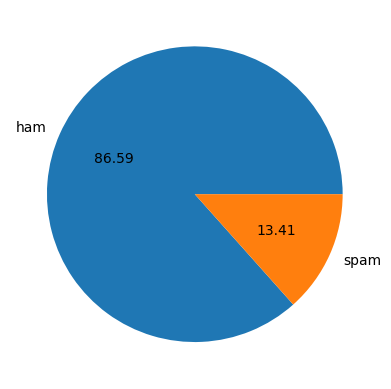

In [12]:
plt.pie(df['Category'].value_counts(), labels = ['ham', 'spam'], autopct = '%.2f')
plt.show()

In [13]:
print(df['Message'][0])

Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...


In [16]:
arr = []
for i in data['Message']:
  new_text = nltk.word_tokenize(i)
  arr.append(' '.join(new_text))

In [17]:
data['Message'] = pd.Series(arr)

In [18]:
data.head()

,Category,Message
0,0,"Go until jurong point , crazy .. Available onl..."
1,0,Ok lar ... Joking wif u oni ...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor ... U c already then sa...
4,0,"Nah I do n't think he goes to usf , he lives a..."


In [19]:
data['num_characters'] = data['Message'].apply(len)

In [20]:
data['Message'].apply(lambda x : nltk.word_tokenize(x))

,Message
0,"[Go, until, jurong, point, ,, crazy, .., Avail..."
1,"[Ok, lar, ..., Joking, wif, u, oni, ...]"
2,"[Free, entry, in, 2, a, wkly, comp, to, win, F..."
3,"[U, dun, say, so, early, hor, ..., U, c, alrea..."
4,"[Nah, I, do, n't, think, he, goes, to, usf, ,,..."
...,...
5567,"[This, is, the, 2nd, time, we, have, tried, 2,..."
5568,"[Will, ü, b, going, to, esplanade, fr, home, ?]"
5569,"[Pity, ,, *, was, in, mood, for, that, ., So, ..."
5570,"[The, guy, did, some, bitching, but, I, acted,..."


In [21]:
data['num_word'] = data['Message'].apply(lambda x: len(nltk.word_tokenize(x)))

In [22]:
data['num_sents'] = data['Message'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [23]:
data[['num_characters', 'num_word', 'num_sents']].describe()

,num_characters,num_word,num_sents
count,5572.000000,5572.000000,5572.000000
mean,83.577172,18.829146,2.055815
std,62.237955,13.856467,1.615735
min,2.000000,1.000000,1.000000
25%,37.000000,9.000000,1.000000
50%,64.000000,15.000000,2.000000
75%,127.000000,27.000000,3.000000
max,914.000000,220.000000,38.000000


In [24]:
data[data['Category'] == 1][['num_characters', 'num_word', 'num_sents']].describe()

,num_characters,num_word,num_sents
count,747.000000,747.000000,747.000000
mean,142.082999,27.878179,3.131191
std,30.926464,7.036282,1.582047
min,9.000000,2.000000,1.000000
25%,136.000000,25.000000,2.000000
50%,152.000000,29.000000,3.000000
75%,161.000000,32.000000,4.000000
max,229.000000,46.000000,9.000000


In [25]:
data[data['Category'] == 0][['num_characters', 'num_word', 'num_sents']].describe()

,num_characters,num_word,num_sents
count,4825.000000,4825.000000,4825.000000
mean,74.519378,17.428187,1.889326
std,60.937467,14.122108,1.555956
min,2.000000,1.000000,1.000000
25%,35.000000,8.000000,1.000000
50%,54.000000,13.000000,1.000000
75%,96.000000,23.000000,2.000000
max,914.000000,220.000000,38.000000


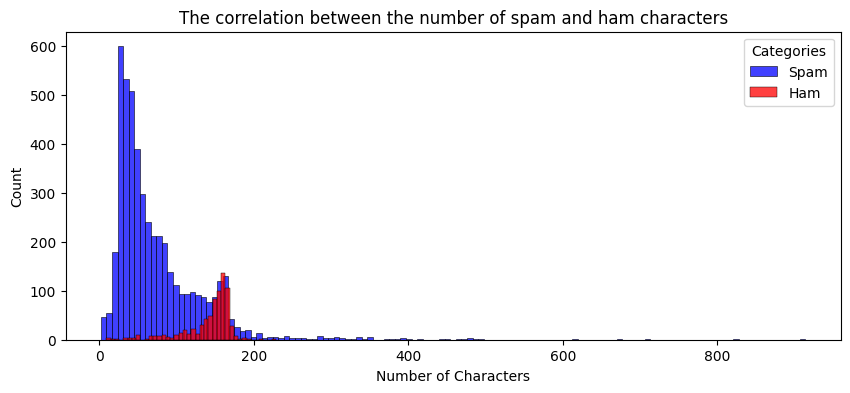

In [26]:
plt.figure(figsize=(10, 4))

sns.histplot(data[data['Category'] == 0]['num_characters'], label='Spam', color='blue')
sns.histplot(data[data['Category'] == 1]['num_characters'], label='Ham', color='red')

plt.title('The correlation between the number of spam and ham characters')
plt.xlabel('Number of Characters')
plt.legend(title='Categories')
plt.show()


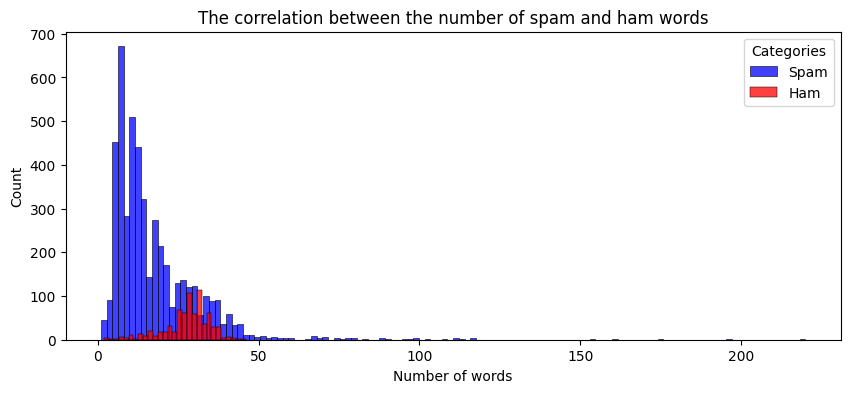

In [27]:
plt.figure(figsize=(10, 4))

sns.histplot(data[data['Category'] == 0]['num_word'], label='Spam', color='blue')
sns.histplot(data[data['Category'] == 1]['num_word'], label='Ham', color='red')


plt.title('The correlation between the number of spam and ham words')
plt.xlabel('Number of words')
plt.legend(title='Categories')
plt.show()


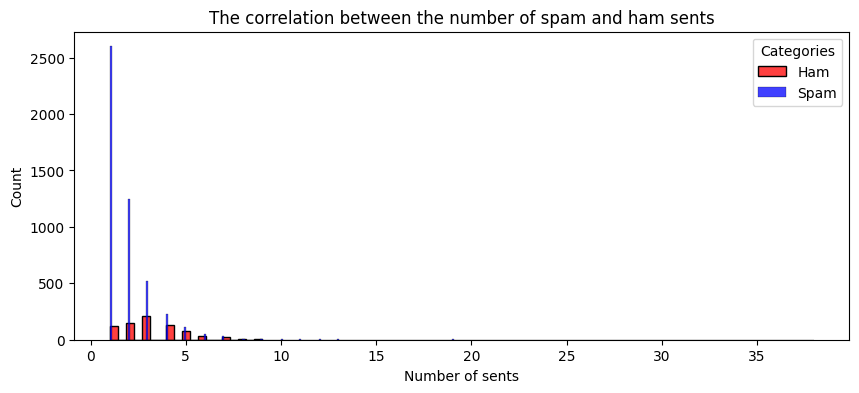

In [28]:
plt.figure(figsize=(10, 4))

sns.histplot(data[data['Category'] == 1]['num_sents'], label='Ham', color='red')
sns.histplot(data[data['Category'] == 0]['num_sents'], label='Spam', color='blue')

plt.title('The correlation between the number of spam and ham sents')
plt.xlabel('Number of sents')
plt.legend(title='Categories')
plt.show()

## **Model Building**
/# Cross Validate

/# Randomized Grid Search

In [29]:
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import re

from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report


import pickle

In [32]:
stemmer = PorterStemmer()
stop_words = set(stopwords.words('english'))

In [33]:
def preprocess_text(text):
  text = text.lower()
  text = re.sub(r'\W', ' ', text)
  text = re.sub(r'\s+', ' ', text)
  text = ' '.join([stemmer.stem(word) for word in text.split() if word not in stop_words])
  return text

In [34]:
data['transformed_text'] = data['Message'].apply(preprocess_text)

In [35]:
data['transformed_text']

,transformed_text
0,go jurong point crazi avail bugi n great world...
1,ok lar joke wif u oni
2,free entri 2 wkli comp win fa cup final tkt 21...
3,u dun say earli hor u c alreadi say
4,nah n think goe usf live around though
...,...
5567,2nd time tri 2 contact u u 750 pound prize 2 c...
5568,ü b go esplanad fr home
5569,piti mood suggest
5570,guy bitch act like interest buy someth els nex...


In [36]:
X_train, X_test, y_train, y_test = train_test_split(data['transformed_text'], data['Category'], test_size = 0.2, random_state = 42)

In [37]:
vectorizers = {
    'Count Vectorizer' : CountVectorizer(),
    'TF-IDF Vectorizer' : TfidfVectorizer()
}

In [38]:
models = {
    'Naive Bayes' : MultinomialNB(),
    'Logistic Regression' : LogisticRegression(C = 0.1, max_iter = 1000, random_state = 42),
    'SVM' : SVC(kernel = 'linear', C = 0.1, probability = True, random_state = 42)
}

In [39]:
param_grids = {
    'Naive Bayes': {
        'alpha': [0.1, 0.5, 1, 1.5, 2]
    },
    'Logistic Regression': {
        'C': [0.01, 0.1, 1, 10, 100],
        'max_iter': [100, 500, 1000]
    },
    'SVM': {
        'C': [0.01, 0.1, 1, 10, 100],
        'kernel': ['linear', 'rbf']
    }
}

In [44]:
def find_best_params(X_train, y_train):
  best_params ={}
  for model_name, model in models.items():
    print(f'Randomized Grid Search for {model_name}...')
    param_grid = param_grids[model_name]
    randomized_search = RandomizedSearchCV(model, param_grid, n_iter = 5, scoring = 'f1', cv = 5, random_state= 42)
    randomized_search.fit(X_train, y_train)

    best_params[model_name] = randomized_search.best_params_
    print(f'Best parameters for {model_name}:{randomized_search.best_params_}')

  return best_params

In [46]:
def perform_cross_validation(X_train, y_train, best_params):
  best_models = {}
  for model_name, model in models.items():
    print(f'Cross validation for {model_name} with best parameters...')

    model.set_params(**best_params[model_name])

    scores = cross_val_score(model, X_train, y_train, scoring='f1', cv=5)
    mean_score = scores.mean()
    print(f'Mean F1 score for {model_name}: {mean_score}')

    best_models[model_name] = model

  return best_models

In [50]:
def final_evaluation(X_train, X_test, y_train, y_test, best_models, vectorizer):
  best_f1_score = 0
  best_model_name = None
  best_model = None
  best_vectorizer = None

  for model_name, model in best_models.items():
    print(f'Evaluating {model_name} in Test Set ...')
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    f1 = f1_score(y_test, y_pred)

    print(f'Model Name: {model_name}')
    print('Accuracy: ', accuracy_score(y_test, y_pred))
    print('Precision: ', precision_score(y_test, y_pred))
    print('Recall: ', recall_score(y_test, y_pred))
    print('f1 score: ', f1)
    print('Classification report:\n', classification_report(y_test, y_pred))

    if f1 > best_f1_score:
      best_f1_score = f1
      best_model = model
      best_model_name = model_name
      best_vectorizer = vectorizer
  print('Best_model: ', best_model_name)
  print("Best F1 Score on Test Set:", best_f1_score)
  return best_model, best_model_name, best_vectorizer

In [53]:
best_model_name = None
best_model = None
best_vectorizer_name = None
best_vectorizer = None
best_f1_score = 0


for vectorizer_name, vectorizer in vectorizers.items():
  print(f'Vectorizer: {vectorizer_name}')
  X_train_vect = vectorizer.fit_transform(X_train)
  X_test_vect = vectorizer.transform(X_test)

  # Find best parameters
  best_params = find_best_params(X_train_vect, y_train)

  # Perform cross-validation
  candidate_models = perform_cross_validation(X_train_vect, y_train, best_params)

  current_model, current_model_name, current_vectorizer = final_evaluation(X_train_vect, X_test_vect, y_train, y_test, candidate_models, vectorizer)

  if (best_model is None) or (f1_score(y_test, current_model.predict(X_test_vect)) > best_f1_score):
    best_f1_score = f1_score(y_test, current_model.predict(X_test_vect))
    best_model_name = current_model_name
    best_model = current_model
    best_vectorizer = vectorizer
    best_vectorizer_name = vectorizer_name

print('Best vectorizer: ', best_vectorizer_name)
print('Best model: ', best_model_name)

Vectorizer: Count Vectorizer
Randomized Grid Search for Naive Bayes...
Best parameters for Naive Bayes:{'alpha': 2}
Randomized Grid Search for Logistic Regression...
Best parameters for Logistic Regression:{'max_iter': 500, 'C': 100}
Randomized Grid Search for SVM...
Best parameters for SVM:{'kernel': 'linear', 'C': 100}
Cross validation for Naive Bayes with best parameters...
Mean F1 score for Naive Bayes: 0.9320764613658309
Cross validation for Logistic Regression with best parameters...
Mean F1 score for Logistic Regression: 0.9341624059571858
Cross validation for SVM with best parameters...
Mean F1 score for SVM: 0.9223688858040358
Evaluating Naive Bayes in Test Set ...
Model Name: Naive Bayes
Accuracy:  0.9847533632286996
Precision:  0.9782608695652174
Recall:  0.9060402684563759
f1 score:  0.9407665505226481
Classification report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99       966
           1       0.98      0.91      0.

In [55]:
message = input('Input message: ')
message_vect = best_vectorizer.transform([message])
prediction = best_model.predict(message_vect)
print(prediction)
if prediction[0] == 0:
  print('This is not a spam message')
else:
  print('This is a spam message')

Input messageCongratulations! You are the lucky winner of our lottery. You have won a $1,000,000 prize. To claim your reward, please click the link below and enter your information now!
[1]
This is a spam message


In [56]:
pickle.dump(best_vectorizer, open('vectorizer.pkl', 'wb'))
pickle.dump(best_model, open('model.pkl', 'wb'))